In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeRegressor

In [2]:
gs = pd.read_csv('../Datasets/vgsales.csv', sep=',')
gs = gs.dropna()

In [3]:
gs.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
gs_train, gs_test = train_test_split(gs, test_size=0.3, random_state=42, stratify=gs['Genre'])
print(gs_train.shape, gs_test.shape)

(11403, 11) (4888, 11)


In [5]:
features= ['JP_Sales']
dt_regression = DecisionTreeRegressor(max_depth = 5) # Increase max_depth to see effect in the plot
dt_regression.fit(gs_train[features], gs_train['Global_Sales'])

DecisionTreeRegressor(max_depth=5)

In [6]:
def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

In [7]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [8]:
predictionsOnTrainset = dt_regression.predict(gs_train[features])
predictionsOnTestset = dt_regression.predict(gs_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, gs_train.Global_Sales)
rmseTest = calculate_rmse(predictionsOnTestset, gs_test.Global_Sales)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 1.0562265855302964
RMSE on test set 1.4369890517683084


## Is the RMSE different? Did you expect this difference?
Yes, it slightly differs per set. I expected this because the test set uses a smaller set than the training set, so there are fewer values that can impact the calculation, that's why it's higher here.

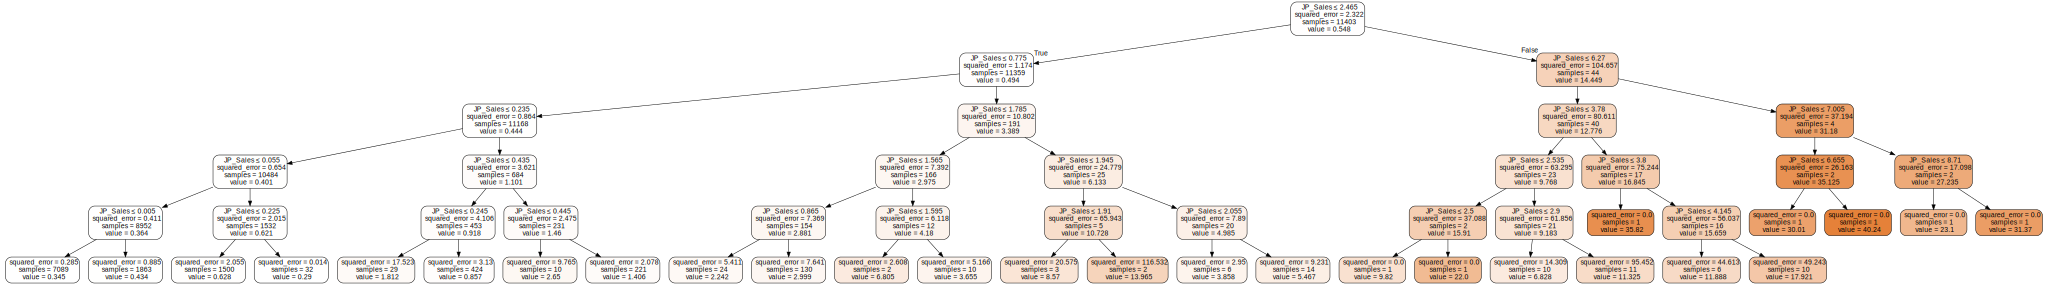

In [9]:
plot_tree_regression(dt_regression, features)